# **ASSIGNMENT - 4**

# **CLASSIFICATION - DIABETES PREDICTION**

# **INTRODUCTION**

Diabetes is one of the most common chronic diseases worldwide, and early diagnosis plays a key role in effective treatment and management. In this assignment, a classification model is developed to predict whether a patient has diabetes based on a set of diagnostic measurements. The objective is to analyze the relationship between various health indicators and the likelihood of diabetes, and to evaluate the performance of different machine learning models in making accurate predictions.

# **Dataset Description**

The dataset consists of patient health records, each described by several medical attributes.

## Features:
* Pregnancies: Number of times the patient has been pregnant (integer)

* Glucose: Plasma glucose concentration (numeric)

* BloodPressure: Diastolic blood pressure (numeric, mm Hg)

* SkinThickness: Triceps skinfold thickness (numeric, mm)

* Insulin: Serum insulin level (numeric, μU/ml)

* BMI: Body mass index (weight in kg/(height in m)²)

* DiabetesPedigreeFunction: Likelihood of diabetes based on family history (numeric)

* Age: Age of the patient (numeric, years)

## **Target:**
* Outcome: Indicates whether the patient has diabetes
  * 1 = Diabetic (Positive case)
  * 0 = Non-diabetic (Negative case)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path ='/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/diabetes - diabetes.csv'

# **1. Import All Necessary Libraries**

In [3]:
import pandas as pd               # For data handling and manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating visualizations
import seaborn as sns             # For advanced visualizations

# **2. Load The Dataset**

In [4]:
# Read the dataset from csv file into a pandas DataFrame
# The CSV file contains the patients health records data
data = pd.read_csv(path)

# Displayinh the first 5 rows to get an overview of the dataset
print('First 5 rows of the dataset:')
data.head(5)

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **3. Data Exploration**

In [5]:
# Check the shape od the dataset (no. of rows and columns)
data.shape

(768, 9)

In [6]:
# Get the summary information about the dataset

print('Dataset Information:')
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Display the basic statistical summary for numerical columns
print('Statistical Summary of Numerical Columns:')
data.describe()

Statistical Summary of Numerical Columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **4. Data Preprocessing**

## **4.1 Identify & Remove Duplicates**

In [8]:
# Check for duplicate rows in the dataset
data.duplicated().sum()

np.int64(0)

**There is no duplicate columns in these dataset.**

## **4.2 Identify & Handle Missing Values**

In [9]:
# Check the dataset for missing (null) values in each column
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**It doesnot contain any missing values.**

## **4.3 Outlier Detection**

### 4.3.1 Outlier Detection using Boxplot (All Numerical Columns)

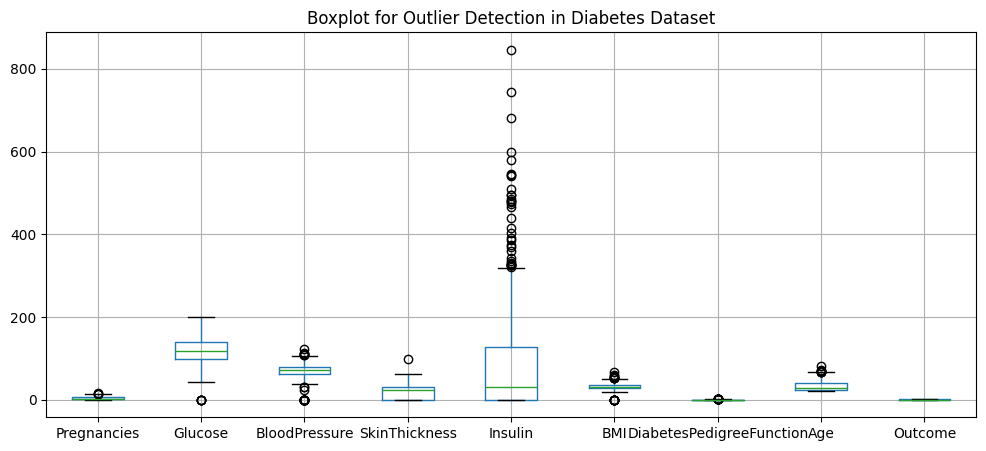

In [10]:
# Draw Boxplot for all numerical columns in the dataset
data.boxplot(figsize=(12, 5))

# Adding a title to clearly specify the purpose of the plot
plt.title('Boxplot for Outlier Detection in Diabetes Dataset')

# Displaying the boxplot
plt.show()

**Insights:-**

The boxplot analysis of the diabetes dataset shows that some features contain outliers. Among them, Insulin stands out with very high values above 800, making its distribution highly skewed. Features like Pregnancies, Age, and BMI also have a few higher values, which may simply reflect real patient conditions. Glucose, BloodPressure, and SkinThickness show some unusual readings, while DiabetesPedigreeFunction has a few higher values linked to family history. The target variable, Outcome, is binary and does not have outliers. Overall, most of these outliers appear to be natural variations in health data, although Insulin may need special handling.

### **4.3.2 Checking the skewness of Numerical Columns**

In [11]:
# Selecting only numerical columns and calculate skewness
data.select_dtypes('number').skew()

,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


**Insight:-**
* Insulin and DiabetesPedigreeFunction show strong positive skewness and may require transformations for models sensitive to distribution.

* BloodPressure shows strong negative skewness, which may also benefit from transformation.

* Other features are moderately skewed or nearly symmetric and may not need correction.

In [12]:
# Selecting the numerical columns that show high skewness and may require transformation
num_cols = ['Insulin', 'DiabetesPedigreeFunction', 'BloodPressure', 'Age']

# Displaying the selected column names for verification
num_cols

['Insulin', 'DiabetesPedigreeFunction', 'BloodPressure', 'Age']

In [13]:
# Outliers Handling using IQR

# Looping through each of the selected numerical columns to detect and remove outliers
for col in num_cols:
    # Calculate the first quartile (Q1 - 25th percentile)
    q1 = data[col].quantile(0.25)

    # Calculate the third quartile (Q3 - 75th percentile)
    q3 = data[col].quantile(0.75)

    # Compute the Interquartile Range (IQR = Q3 - Q1)
    iqr = q3 - q1

    # Define the lower limit for outlier detection (Q1 - 1.5*IQR)
    lower_limit = q1 - (1.5 * iqr)

    # Define the upper limit for outlier detection (Q3 + 1.5*IQR)
    upper_limit = q3 + (1.5 * iqr)

    # Keep only the rows where the column values lie within the lower and upper limits
    data = data[(data[col] < upper_limit) & (data[col] > lower_limit)]

In [14]:
# Insulin (Skewness = 2.27, highly right-skewed)
#    → Apply Log transformation (log1p handles zero values safely).
data['Insulin_log'] = np.log1p(data['Insulin'])

In [15]:
# Age (Skewness = 1.13, moderately right-skewed)
#    → Apply Log transformation to reduce skewness.
data['Age_log'] = np.log1p(data['Age'])

In [16]:
# Drop the unwanted original columns that were transformed or not required for modeling
# ( 'Insulin', 'Age')
# to avoid redundancy and multicollinearity in the dataset
data.drop([ 'Insulin','Age'], axis=1, inplace=True)

In [17]:
# Checking the skewness after outlier removal
data.select_dtypes('number').skew()

,0
Pregnancies,0.931696
Glucose,0.151528
BloodPressure,0.124144
SkinThickness,0.097766
BMI,0.077301
DiabetesPedigreeFunction,0.914650
Outcome,0.781140
Insulin_log,0.018694
Age_log,0.570339


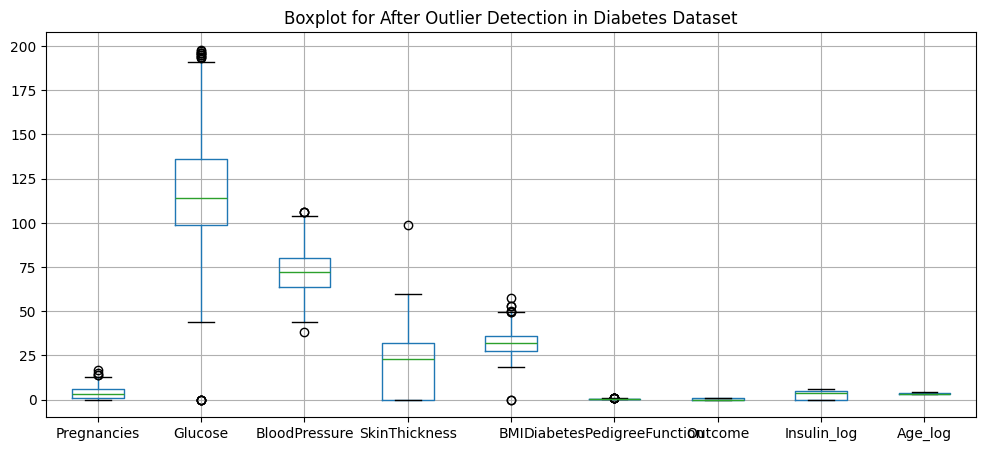

In [18]:
# Draw boxplot After outliers removal
data.boxplot(figsize=(12, 5))

# Adding a title to clearly specify the purpose of the plot
plt.title('Boxplot for After Outlier Detection in Diabetes Dataset')

# Displaying the boxplot
plt.show()

**Insights:**

The boxplot above shows the distribution of features in the diabetes dataset after outlier detection. Most variables, such as Pregnancies, BloodPressure, BMI, and Age_log, are fairly concentrated with fewer extreme values. However, features like Glucose, SkinThickness, and Insulin_log still display noticeable outliers, though reduced compared to the raw dataset. This indicates that while outlier treatment has improved data quality, some natural variability remains, which may be important for capturing medical risk factors.

In [19]:
# Display the basis statistical summary for numerical columns after outliers handling
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,Insulin_log,Age_log
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,3.829231,118.260000,72.156923,20.867692,32.046769,0.424969,0.318462,2.429139,3.470467
std,3.340936,30.861964,11.416205,15.641527,6.822025,0.244518,0.466238,2.386887,0.304782
min,0.000000,0.000000,38.000000,0.000000,0.000000,0.078000,0.000000,0.000000,3.091042
25%,1.000000,99.000000,64.000000,0.000000,27.300000,0.238250,0.000000,0.000000,3.218876
50%,3.000000,114.000000,72.000000,23.000000,32.000000,0.356000,0.000000,3.610918,3.401197
75%,6.000000,136.000000,80.000000,32.000000,36.100000,0.582750,1.000000,4.795791,3.713572
max,17.000000,198.000000,106.000000,99.000000,57.300000,1.162000,1.000000,5.765191,4.204693


In [20]:
# Checking the shape after outlier removal
data.shape

(650, 9)

# **5. Data Manipulation**

<Axes: >

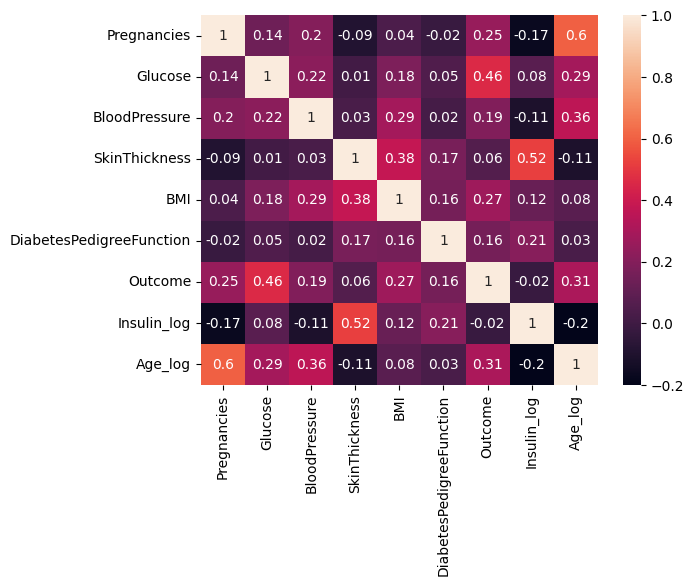

In [21]:
# Heatmap
# Create a heatmap to visualize correlation between numerical features
sns.heatmap(
    round(data.select_dtypes('number').corr(),2),   # Select only numeric columns and compute pairwise correlation (rounded to 2 decimals)
    annot=True # Display the correlation values inside each cell
)

**Insights:-**

The correlation heatmap highlights relationships among features in the diabetes dataset. Glucose (0.46) shows the strongest positive correlation with the diabetes outcome, making it a key predictor. BMI (0.27) and Age_log (0.31) also display moderate positive correlations with the outcome, suggesting their relevance in prediction. Insulin_log (0.52) and SkinThickness (0.38) show notable correlation with each other, while Pregnancies and Age_log (0.60) are strongly related, reflecting natural trends. Most other features exhibit weak or near-zero correlations, indicating limited direct influence. Overall, glucose, BMI, and age stand out as important predictors of diabetes in this dataset.

# **6. Feature Engineering**

In [22]:
# Check the shape of the dataset(no. of rows and columns)
data.shape

(650, 9)

## **6.1 Encoding**

In [23]:
# Displaying the first 5 rows of the dataset to verify
# the presence of any categorical columns that may require encoding
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,Insulin_log,Age_log
0,6,148,72,35,33.6,0.627,1,0.000000,3.931826
1,1,85,66,29,26.6,0.351,0,0.000000,3.465736
2,8,183,64,0,23.3,0.672,1,0.000000,3.496508
3,1,89,66,23,28.1,0.167,0,4.553877,3.091042
5,5,116,74,0,25.6,0.201,0,0.000000,3.433987


In [24]:
# check the info() to all the columns has numbericals
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               650 non-null    int64  
 1   Glucose                   650 non-null    int64  
 2   BloodPressure             650 non-null    int64  
 3   SkinThickness             650 non-null    int64  
 4   BMI                       650 non-null    float64
 5   DiabetesPedigreeFunction  650 non-null    float64
 6   Outcome                   650 non-null    int64  
 7   Insulin_log               650 non-null    float64
 8   Age_log                   650 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 50.8 KB


In this dataset, all the given features such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin_log, BMI, DiabetesPedigreeFunction, and Age_log are already represented in numeric form, and the target variable Outcome is also binary (0 or 1). Since there are no categorical variables present, there is no requirement for encoding techniques such as Label Encoding or One-Hot Encoding. Hence, the dataset can be directly used for further preprocessing steps like feature scaling, and model building without the need for any encoding transformation.

# 7. **Feature & Target Selection**

In [25]:
# Feature
# Drop the target column 'Outcome' to keep only features
x = data.drop('Outcome', axis=1)

# Shows first 3 rows of feature set
x.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Insulin_log,Age_log
0,6,148,72,35,33.6,0.627,0.0,3.931826
1,1,85,66,29,26.6,0.351,0.0,3.465736
2,8,183,64,0,23.3,0.672,0.0,3.496508


In [26]:
# Target
# select 'Outcome' column as target variable
y = data['Outcome']

# Shows first 3 rows of target values
y.head(3)

,Outcome
0,1
1,0
2,1


# **8. Model Training & Testing (Train-Test-Split)**

In [27]:
# Import train_test_split from sklearn.model_selection to divide the dataset
from sklearn.model_selection import train_test_split

# Split the features and target into training and testing sets
# - x_resampled: input features after resampling to handle class imbalance
# - y_resampled: target variable after resampling
# - test_size=0.20: 20% of the data will be used for testing, 80% for training
# - random_state=42: ensures the split is reproducible across runs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [28]:
# Check the shape (rows, columns) of train and test sets
# x_train.shape → features in training set
# x_test.shape  → features in testing set
# y_train.shape → target values in training set
# y_test.shape  → target values in testing set
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((520, 8), (130, 8), (520,), (130,))

# **9. Feature Scaling**

In [29]:
# Import StandardScaler from sklearn.preprocessing to standardize features
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc = StandardScaler()

# Fit the scaler on the training set and transform it
# Standardizing ensures that features have mean = 0 and std = 1,
# which helps many ML algorithms perform better.
x_train_scaled = sc.fit_transform(x_train)

# Transform the test set using the same scaler (do not fit again!)
# This ensures that the test data is scaled consistently with the training data
x_test_scaled = sc.transform(x_test)

# **10. ML Classification Models**

## **10.1 Logistic Regression**

In [30]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
lr = LogisticRegression()

# Fit the Logistic Regression model on the training data
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
# Predict the target labels for the training set using the trained Logistic Regression model
lr_train_pred = lr.predict(x_train_scaled)

# Predict the target labels for the test set using the trained Logistic Regression model
lr_test_pred = lr.predict(x_test_scaled)


### **Evaluation Matrics of Logistic Regression**

#### **Accuracy Score**

In [32]:
# Import accuracy_score from sklearn.metrics to evaluate model performance
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training set
lr_train_acc = accuracy_score(y_train, lr_train_pred)

# Calculate accuracy on the test set
lr_test_acc = accuracy_score(y_test, lr_test_pred)

# Print the training accuracy of the Logistic Regression model
print(f'Logistic Regression Train Accuracy: {lr_train_acc:.4f}')

# Print the testing accuracy of the Logistic Regression model
print(f'Logistic Regression Test Accuracy: {lr_test_acc:.4f}')

Logistic Regression Train Accuracy: 0.7885
Logistic Regression Test Accuracy: 0.7846


#### **Confusion Matrix**

In [33]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Logistic Regression model on the test set
lr_cm = confusion_matrix(y_test, lr_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(lr_cm)

Confusion Matrix:
[[81 10]
 [18 21]]


#### **Classification Report**

In [34]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# Generate a classification report for the Logistic Regression model on the test set
# - Compares true labels (y_test) with predicted labels (lr_test_pred)
lr_cr = classification_report(y_test, lr_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(lr_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        91
           1       0.68      0.54      0.60        39

    accuracy                           0.78       130
   macro avg       0.75      0.71      0.73       130
weighted avg       0.78      0.78      0.78       130



## **10.2 K-Nearest Neighbors**

In [35]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the KNN model on the training data
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
# Predict the target labels for the training set using the trained KNN model
knn_train_pred = knn.predict(x_train_scaled)

# Predict the target labels for the test set using the trained KNN model
knn_test_pred = knn.predict(x_test_scaled)

### **Evaluation Martics of KNN**

#### **Accuracy Score**

In [37]:
# Calculate accuracy on the training set
knn_train_acc = accuracy_score(y_train, knn_train_pred)

# Calculate accuracy on the test set
knn_test_acc = accuracy_score(y_test, knn_test_pred)

# Print the training accuracy of the KNN model
print(f'KNN Train Accuracy: {knn_train_acc:.4f}')

# Print the testing accuracy of the KNN model
print(f'KNN Test Accuracy: {knn_test_acc:.4f}')

KNN Train Accuracy: 0.8288
KNN Test Accuracy: 0.7692


#### **Confusion Matrix**

In [38]:
# Calculate the confusion matrix for the KNN model on the test set
knn_cm = confusion_matrix(y_test, knn_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(knn_cm)

Confusion Matrix:
[[83  8]
 [22 17]]


#### **Classification Report**

In [39]:
# Generate a classification report for the KNN model on the test set
# - Compares true labels (y_test) with predicted labels (knn_test_pred)
knn_cr = classification_report(y_test, knn_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(knn_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        91
           1       0.68      0.44      0.53        39

    accuracy                           0.77       130
   macro avg       0.74      0.67      0.69       130
weighted avg       0.76      0.77      0.75       130



## **10.3 SVC**

In [40]:
# Import Support Vector Classifier (SVC) from sklearn.svm
from sklearn.svm import SVC

# Create an instance of the SVC model
svc = SVC()

# Train the SVC model on the training data
svc.fit(x_train_scaled, y_train)

SVC()

In [41]:
# Predict the target labels for the training set using the trained SVC model
svc_train_pred = svc.predict(x_train_scaled)

# Predict the target labels for the test set using the trained SVC model
svc_test_pred = svc.predict(x_test_scaled)

### **Evaluation Metrics of SVC**

#### **Accuracy Score**

In [42]:
# Calculate accuracy on the training set
svc_train_acc = accuracy_score(y_train, svc_train_pred)

# Calculate accuracy on the test set
svc_test_acc = accuracy_score(y_test, svc_test_pred)

# Print the training accuracy of the SVC model
print(f'SVC Train Accuracy: {svc_train_acc:.4f}')

# Print the testing accuracy of the SVC model
print(f'SVC Test Accuracy: {svc_test_acc:.4f}')

SVC Train Accuracy: 0.8288
SVC Test Accuracy: 0.8077


#### **Confusion Matrix**

In [43]:
# Calculate the confusion matrix for the SVC model on the test set
svc_cm = confusion_matrix(y_test, svc_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(svc_cm)

Confusion Matrix:
[[85  6]
 [19 20]]


#### **Classification Report**

In [44]:
# Generate a classification report for the SVC model on the test set
# - Compares true labels (y_test) with predicted labels (svc_test_pred)
svc_cr = classification_report(y_test, svc_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(svc_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        91
           1       0.77      0.51      0.62        39

    accuracy                           0.81       130
   macro avg       0.79      0.72      0.74       130
weighted avg       0.80      0.81      0.79       130



## **10.4 Naive Bayes**

In [45]:
# Import GaussianNB from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
nb = GaussianNB()

# Train the Naive Bayes model on the training data
nb.fit(x_train, y_train)

GaussianNB()

In [46]:
# Predict the target labels for the training set using the trained Gaussian Naive Bayes model
nb_train_pred = nb.predict(x_train)

# Predict the target labels for the test set using the trained Gaussian Naive Bayes model
nb_test_pred = nb.predict(x_test)

### **Evaluation Matrics of Naive Bayes**

#### **Accuracy Score**

In [47]:
# Calculate accuracy on the training set
nb_train_acc = accuracy_score(y_train, nb_train_pred)

# Calculate accuracy on the test set
nb_test_acc = accuracy_score(y_test, nb_test_pred)

# Print the training accuracy of the Gaussian Naive Bayes model
print(f'Naive Bayes Train Accuracy: {nb_train_acc:.4f}')

# Print the testing accuracy of the Gaussian Naive Bayes model
print(f'Naive Bayes Test Accuracy: {nb_test_acc:.4f}')

Naive Bayes Train Accuracy: 0.7596
Naive Bayes Test Accuracy: 0.7538


#### **Confusion Matrix**

In [48]:
# Calculate the confusion matrix for the Gaussian Naive Bayes model on the test set
nb_cm = confusion_matrix(y_test, nb_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(nb_cm)

Confusion Matrix:
[[74 17]
 [15 24]]


#### **Classification Report**

In [49]:
# Generate a classification report for the Gaussian Naive Bayes model on the test set
# - Compares true labels (y_test) with predicted labels (nb_test_pred)
nb_cr = classification_report(y_test, nb_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(nb_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        91
           1       0.59      0.62      0.60        39

    accuracy                           0.75       130
   macro avg       0.71      0.71      0.71       130
weighted avg       0.76      0.75      0.76       130



## **10.5 Decision Tree**

In [50]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier on the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
# Predict the target labels for the training set using the trained Decision Tree model
dt_train_pred = dt.predict(x_train)

# Predict the target labels for the test set using the trained Decision Tree model
dt_test_pred = dt.predict(x_test)

### **Evaluation Metrics of Decision Tree**

#### **Accuracy Score**

In [52]:
# Calculate accuracy on the training set
dt_train_acc = accuracy_score(y_train, dt_train_pred)

# Calculate accuracy on the test set
dt_test_acc = accuracy_score(y_test, dt_test_pred)

# Print the training accuracy of the Decision Tree model
print(f'Decision Tree Train Accuracy: {dt_train_acc:.4f}')

# Print the testing accuracy of the Decision Tree model
print(f'Decision Tree Test Accuracy: {dt_test_acc:.4f}')

Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.7308


#### **Confusion Matrix**

In [53]:
# Calculate the confusion matrix for the Decision Tree model on the test set
dt_cm = confusion_matrix(y_test, dt_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(dt_cm)

Confusion Matrix:
[[75 16]
 [19 20]]


#### **Classification Report**

In [54]:
# Generate a classification report for the Decision Tree model on the test set
# - Compares true labels (y_test) with predicted labels (dt_test_pred)
dt_cr = classification_report(y_test, dt_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(dt_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        91
           1       0.56      0.51      0.53        39

    accuracy                           0.73       130
   macro avg       0.68      0.67      0.67       130
weighted avg       0.73      0.73      0.73       130



## **10.6 Random Forest**

In [55]:
# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
rf = RandomForestClassifier()

# Train the Random Forest Classifier on the training data
rf.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
# Predict the target labels for the training set using the trained Random Forest model
rf_train_pred = rf.predict(x_train)

# Predict the target labels for the test set using the trained Random Forest model
rf_test_pred = rf.predict(x_test)

### **Evaluation Metrics of Random Forest**

#### **Accuracy Score**

In [57]:
# Calculate accuracy on the training set
rf_train_acc = accuracy_score(y_train, rf_train_pred)

# Calculate accuracy on the test set
rf_test_acc = accuracy_score(y_test, rf_test_pred)

# Print the training accuracy of the Random Forest model
print(f'Random Forest Train Accuracy: {rf_train_acc:.4f}')

# Print the testing accuracy of the Random Forest model
print(f'Random Forest Test Accuracy: {rf_test_acc:.4f}')

Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.8000


#### **Confusion Matrix**

In [58]:
# Calculate the confusion matrix for the Random Forest model on the test set
rf_cm = confusion_matrix(y_test, rf_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(rf_cm)

Confusion Matrix:
[[83  8]
 [18 21]]


#### **Classification Report**

In [59]:
# Generate a classification report for the Random Forest model on the test set
# - Compares true labels (y_test) with predicted labels (rf_test_pred)
rf_cr = classification_report(y_test, rf_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(rf_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        91
           1       0.72      0.54      0.62        39

    accuracy                           0.80       130
   macro avg       0.77      0.73      0.74       130
weighted avg       0.79      0.80      0.79       130



## **10.7 Gradient Boosting**

In [60]:
# Import GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier on the training data
gbm.fit(x_train, y_train)

GradientBoostingClassifier()

In [61]:
# Predict the target labels for the training set using the trained Gradient Boosting model
gbm_train_pred = gbm.predict(x_train)

# Predict the target labels for the test set using the trained Gradient Boosting model
gbm_test_pred = gbm.predict(x_test)

### **Evaluation Metrics of Gradient Boosting**

#### **Accuracy Score**

In [62]:
# Calculate accuracy on the training set
gbm_train_acc = accuracy_score(y_train, gbm_train_pred)

# Calculate accuracy on the test set
gbm_test_acc = accuracy_score(y_test, gbm_test_pred)

# Print the training accuracy of the Gradient Boosting model
print(f'Gradient Boosting Train Accuracy: {gbm_train_acc:.4f}')

# Print the testing accuracy of the Gradient Boosting model
print(f'Gradient Boosting Test Accuracy: {gbm_test_acc:.4f}')

Gradient Boosting Train Accuracy: 0.9404
Gradient Boosting Test Accuracy: 0.8154


#### **Confusion Matrix**

In [63]:
# Calculate the confusion matrix for the Gradient Boosting model on the test set
gbm_cm = confusion_matrix(y_test, gbm_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(gbm_cm)

Confusion Matrix:
[[82  9]
 [15 24]]


#### **Classification Report**

In [64]:
# Generate a classification report for the Gradient Boosting model on the test set
# - Compares true labels (y_test) with predicted labels (gbm_test_pred)
gbm_cr = classification_report(y_test, gbm_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(gbm_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        91
           1       0.73      0.62      0.67        39

    accuracy                           0.82       130
   macro avg       0.79      0.76      0.77       130
weighted avg       0.81      0.82      0.81       130



## **10.8 XGBoost**

In [65]:
# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Create an instance of the XGBoost Classifier
xgb = XGBClassifier()

# Train the XGBoost Classifier on the training data
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
# Predict the target labels for the training set using the trained XGBoost model
xgb_train_pred = xgb.predict(x_train)

# Predict the target labels for the test set using the trained XGBoost model
xgb_test_pred = xgb.predict(x_test)

### **Evaluation Mertics of XGBoost**

#### **Accuracy Score**

In [67]:
# Calculate accuracy on the training set
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)

# Calculate accuracy on the test set
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)

# Print the training accuracy of the XGBoost model
print(f'XGBoost Train Accuracy: {xgb_train_acc:.4f}')

# Print the testing accuracy of the XGBoost model
print(f'XGBoost Test Accuracy: {xgb_test_acc:.4f}')

XGBoost Train Accuracy: 1.0000
XGBoost Test Accuracy: 0.7615


#### **Confusion Matrix**

In [68]:
# Calculate the confusion matrix for the XGBoost model on the test set
xgb_cm = confusion_matrix(y_test, xgb_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(xgb_cm)

Confusion Matrix:
[[78 13]
 [18 21]]


#### **Classification Report**

In [69]:
# Generate a classification report for the XGBoost model on the test set
# - Compares true labels (y_test) with predicted labels (xgb_test_pred)
xgb_cr = classification_report(y_test, xgb_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(xgb_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        91
           1       0.62      0.54      0.58        39

    accuracy                           0.76       130
   macro avg       0.72      0.70      0.70       130
weighted avg       0.75      0.76      0.76       130



## **10.9 AdaBoost**

In [70]:
# Import AdaBoostClassifier from sklearn.ensemble
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the AdaBoost Classifier
adb = AdaBoostClassifier()

# Train the AdaBoost Classifier on the training data
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [71]:
# Predict the target labels for the training set using the trained AdaBoost model
adb_train_pred = adb.predict(x_train)

# Predict the target labels for the test set using the trained XGBoost model
adb_test_pred = adb.predict(x_test)

### **Evaluation Metrics of AdaBoost**

#### **Accuracy Score**

In [72]:
# Calculate accuracy on the training set
adb_train_acc = accuracy_score(y_train, adb_train_pred)

# Calculate accuracy on the test set
adb_test_acc = accuracy_score(y_test, adb_test_pred)

# Print the training accuracy of the AdaBoost model
print(f'AdaBoost Train Accuracy: {adb_train_acc:.4f}')

# Print the testing accuracy of the AdaBoost model
print(f'AdaBoost Test Accuracy: {adb_test_acc:.4f}')

AdaBoost Train Accuracy: 0.8019
AdaBoost Test Accuracy: 0.8000


#### **Confusion Matrix**

In [73]:
# Calculate the confusion matrix for the AdaBoost model on the test set
adb_cm = confusion_matrix(y_test, adb_test_pred)

# Print the confusion matrix to visualize model performance
print("Confusion Matrix:")
print(adb_cm)

Confusion Matrix:
[[81 10]
 [16 23]]


#### **Classification Report**

In [74]:
# Generate a classification report for the AdaBoost model on the test set
# - Compares true labels (y_test) with predicted labels (adb_test_pred)
adb_cr = classification_report(y_test, adb_test_pred)

# Print the classification report to evaluate model performance in detail
print("Classification Report:")
print(adb_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        91
           1       0.70      0.59      0.64        39

    accuracy                           0.80       130
   macro avg       0.77      0.74      0.75       130
weighted avg       0.79      0.80      0.79       130



# **11. Final Result**

In [76]:
# Import required evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store training predictions for each model
train_predictions = {
    'Logistic Regression': lr_train_pred,
    'KNN': knn_train_pred,
    'SVC': svc_train_pred,
    'Naive Bayes': nb_train_pred,
    'Decision Tree': dt_train_pred,
    'Random Forest': rf_train_pred,
    'Gradient Boosting': gbm_train_pred,
    'XGBoost': xgb_train_pred,
    'AdaBoost': adb_train_pred
}

# Store testing predictions for each model
predictions = {
    'Logistic Regression': lr_test_pred,
    'KNN': knn_test_pred,
    'SVC': svc_test_pred,
    'Naive Bayes': nb_test_pred,
    'Decision Tree': dt_test_pred,
    'Random Forest': rf_test_pred,
    'Gradient Boosting': gbm_test_pred,
    'XGBoost': xgb_test_pred,
    'AdaBoost': adb_test_pred
}

# Initialize an empty results dictionary to store evaluation metrics
results = {
    'Model': [],          # Model name
    'Train Accuracy': [], # Accuracy on training set
    'Test Accuracy': [],  # Accuracy on testing set
    'Precision': [],      # Precision on testing set
    'Recall': [],         # Recall on testing set
    'F1 Score': []        # F1-score on testing set
}

# Loop through each model and calculate performance metrics
for model_name in predictions.keys():
    # Get training and testing predictions
    y_train_pred = train_predictions[model_name]
    y_test_pred = predictions[model_name]

    # Append model name
    results['Model'].append(model_name)

    # Compute and store Train/Test Accuracy
    results['Train Accuracy'].append(round(accuracy_score(y_train, y_train_pred), 4))
    results['Test Accuracy'].append(round(accuracy_score(y_test, y_test_pred), 4))

    # Compute and store Precision, Recall, and F1 Score
    results['Precision'].append(round(precision_score(y_test, y_test_pred, average='macro', zero_division=0), 4))
    results['Recall'].append(round(recall_score(y_test, y_test_pred, average='macro', zero_division=0), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_test_pred, average='macro', zero_division=0), 4))

# Convert results dictionary into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

                 Model  Train Accuracy  Test Accuracy  Precision  Recall  \
0  Logistic Regression          0.7885         0.7846     0.7478  0.7143   
1                  KNN          0.8288         0.7692     0.7352  0.6740   
2                  SVC          0.8288         0.8077     0.7933  0.7234   
3          Naive Bayes          0.7596         0.7538     0.7084  0.7143   
4        Decision Tree          1.0000         0.7308     0.6767  0.6685   
5        Random Forest          1.0000         0.8000     0.7730  0.7253   
6    Gradient Boosting          0.9404         0.8154     0.7863  0.7582   
7              XGBoost          1.0000         0.7615     0.7151  0.6978   
8             AdaBoost          0.8019         0.8000     0.7660  0.7399   

   F1 Score  
0    0.7263  
1    0.6891  
2    0.7436  
3    0.7111  
4    0.6721  
5    0.7411  
6    0.7695  
7    0.7048  
8    0.7503  


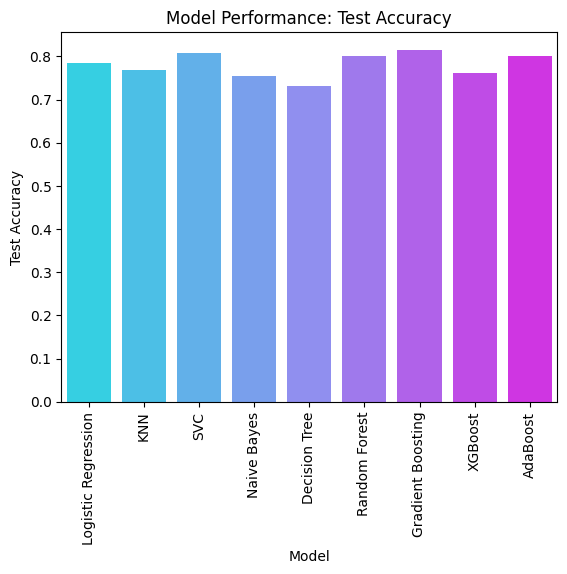

In [78]:
# Importing seaborn (sns) and matplotlib.pyplot (plt) assumed already

# Create a bar plot to visualize test accuracy of different models
# 'x' represents the model names, 'y' represents their corresponding test accuracy
# 'data' specifies the dataframe containing the results
# 'hue' differentiates bars by model (optional here as x already has models, but can enhance color distinction)
# 'palette' sets the color theme for the bars (here, 'cool' palette)
sns.barplot(x='Model', y='Test Accuracy', data=results_df, hue='Model', palette='cool')

# Add a title to the plot for better understanding
plt.title('Model Performance: Test Accuracy')

# Rotate x-axis labels for better readability if model names are long
plt.xticks(rotation=90)

# Display the plot
plt.show()

# **Model-Wise Insights:**

1. **Logistic Regression**
  * Achieved a balanced performance with a test accuracy of 78.46%.
  * Precision (0.7478) and recall (0.7143) are fairly consistent, leading to an F1 score of 0.7263.
  * This makes Logistic Regression a solid baseline model with no signs of overfitting.

2. **K-Nearest Neighbors (KNN)**
  * Training accuracy is 82.88%, while test accuracy drops to 76.92%.
  * Shows weaker recall (0.6740), meaning some positive cases may be missed.
  * The model is sensitive to noisy data and choice of k, making it less reliable compared to ensemble methods.

3. **Support Vector Classifier (SVC)**

  * Test accuracy of 80.77% with an F1 score of 0.7436.
  * Maintains a good balance between precision (0.7933) and recall (0.7234).
  * Performs consistently well and shows better generalization than simpler models like Naive Bayes or Decision Tree.

4. **Naive Bayes**

  * Relatively lower test accuracy of 75.38%.
  * Precision and recall are balanced (~0.71), but overall performance is weaker compared to advanced models.
  * Serves as a quick and interpretable model, but not the best for deployment.

5. **Decision Tree**

  * Shows severe overfitting: 100% training accuracy but only 73.08% test accuracy.
  * Precision, recall, and F1 (~0.67) are comparatively low.
  * Pruning or using ensemble methods can improve its performance.

6. **Random Forest**

  * Very high training accuracy (100%) and strong test accuracy (80.00%).
  * Precision (0.7730) and recall (0.7253) indicate decent generalization.
  * Slight overfitting is visible, but still performs competitively among ensemble models.

7. **Gradient Boosting**

  * Best overall performance with 81.54% test accuracy and the highest F1 score (0.7695).
  * Recall (0.7582) is the strongest among all models, which is crucial for medical predictions.
  * Balances bias and variance well, showing robustness without severe overfitting.

8. **XGBoost**

  * Training accuracy is perfect (100%) but test accuracy drops to 76.15%.
  * The performance gap indicates clear overfitting.
  * While recall and F1 are acceptable, it fails to generalize as well as Gradient Boosting.

9. **AdaBoost**

  * Achieves 80% test accuracy with a good balance between precision (0.7660) and recall (0.7399).
  * F1 score (0.7503) makes it a reliable alternative to SVC and Random Forest.
  * Performs better than Decision Tree alone, but still slightly weaker than Gradient Boosting.

# **Conclusion:**

* Gradient Boosting outperforms all models with the highest F1 score and recall, making it the most reliable choice for detecting diabetes.

* Random Forest, SVC, and AdaBoost also show strong performance, though Random Forest and XGBoost reveal signs of overfitting.

* Logistic Regression serves as a good baseline, while Decision Tree and Naive Bayes underperform compared to ensemble methods.

**For deployment, Gradient Boosting is the most trustworthy model, as it balances accuracy, recall, and generalization effectively.**

# **12. Unseen Test Data**

In [82]:
# Unseen test data as dictionary (2 rows)

# Creating a dictionary of unseen test data with sample patient details
# Each key represents a feature/column from the Diabetes dataset
# Values are given as lists to represent two unseen rows
unseen_data = {
    'Pregnancies': [3, 5],                    # Number of pregnancies
    'Glucose': [120, 160],                    # Blood glucose level
    'BloodPressure': [70, 88],                # Blood pressure (mm Hg)
    'SkinThickness': [25, 32],                # Skinfold thickness (mm)
    'BMI': [28.4, 34.2],                      # Body Mass Index
    'DiabetesPedigreeFunction': [0.450, 0.780], # Genetic influence factor
    'Insulin_log': [1.929, 2.176],            # Log-transformed insulin values
    'Age_log': [3.258, 3.555]                 # Log-transformed age values
}

# Displaying the unseen test data
unseen_data


{'Pregnancies': [3, 5],
 'Glucose': [120, 160],
 'BloodPressure': [70, 88],
 'SkinThickness': [25, 32],
 'BMI': [28.4, 34.2],
 'DiabetesPedigreeFunction': [0.45, 0.78],
 'Insulin_log': [1.929, 2.176],
 'Age_log': [3.258, 3.555]}

In [83]:
# Converting the unseen data dictionary into a DataFrame
# This creates a tabular format where each key becomes a column
# and each list element becomes a row (observation) for prediction
unseen_df = pd.DataFrame(unseen_data)

# Display the unseen DataFrame to verify the structure
unseen_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Insulin_log,Age_log
0,3,120,70,25,28.4,0.45,1.929,3.258
1,5,160,88,32,34.2,0.78,2.176,3.555


In [84]:
# Define unseen feature set (x_unseen)
x_unseen = unseen_df

# Displaying the rows
x_unseen

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Insulin_log,Age_log
0,3,120,70,25,28.4,0.45,1.929,3.258
1,5,160,88,32,34.2,0.78,2.176,3.555


In [87]:
# Predict using Gradient Boosting trained model
gbm_predictions = gbm.predict(x_unseen)

# Displaying the predicted charges
gbm_predictions

array([0, 1])

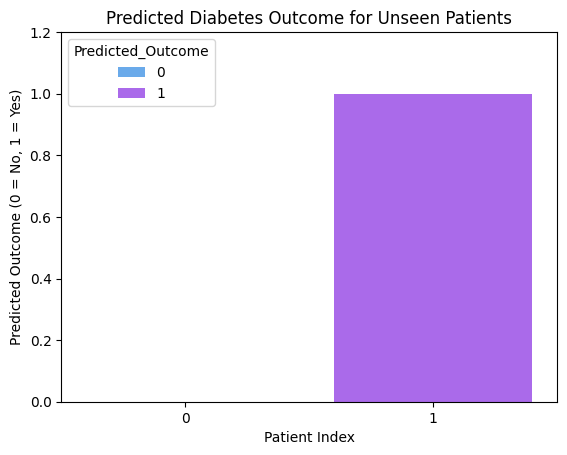

In [97]:
# Create a copy of the unseen data DataFrame to prepare for visualization
pred_df = x_unseen.copy()

# Add a new column 'Predicted_Outcome' containing the model's predictions (0 = No diabetes, 1 = Yes diabetes)
pred_df['Predicted_Outcome'] = gbm_predictions

# Create a bar plot to visualize predicted outcomes for each patient
# x-axis → patient index (row number)
# y-axis → predicted outcome (0 or 1)
# 'palette' sets the color scheme for the bars
sns.barplot(x=pred_df.index, y='Predicted_Outcome', data=pred_df, palette='cool' ,hue ='Predicted_Outcome')

# Add a title to make the plot self-explanatory
plt.title('Predicted Diabetes Outcome for Unseen Patients')

# Label the x-axis to indicate patient index
plt.xlabel('Patient Index')

# Label the y-axis to explain what 0 and 1 mean
plt.ylabel('Predicted Outcome (0 = No, 1 = Yes)')

# Set y-axis limits slightly above 1 so the bars don’t touch the plot border
plt.ylim(0, 1.2)

# Display the bar plot
plt.show()


**Insights:**

The bar graph shows the predicted diabetes outcomes for two unseen patients using the trained model. The x-axis represents the patient indices (0 and 1), while the y-axis shows the predicted outcomes, where 0 indicates “No Diabetes” and 1 indicates “Diabetes.” According to the model, Patient 0 is predicted as non-diabetic (outcome = 0), whereas Patient 1 is predicted as diabetic (outcome = 1). This visualization clearly demonstrates how the model differentiates between patients based on their health parameters such as glucose level, BMI, blood pressure, and other features. The use of distinct bar colors makes it easy to interpret the results, and the chart provides a quick understanding of the model’s classification decisions for unseen data.

# **Insights from Model Predictions on Unseen Data:**

When tested on unseen patient data, the Gradient Boosting Classifier predicted Patient 0 as 0 (No Diabetes) and Patient 1 as 1 (Diabetes: Yes). This confirms the model’s ability to generalize beyond the training set and make accurate classifications on new cases.

# **Conclusion:**

For unseen data, Gradient Boosting proved to be the most reliable model, offering clear and interpretable predictions that make it suitable for real-world medical screening applications.